In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "50_startups.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

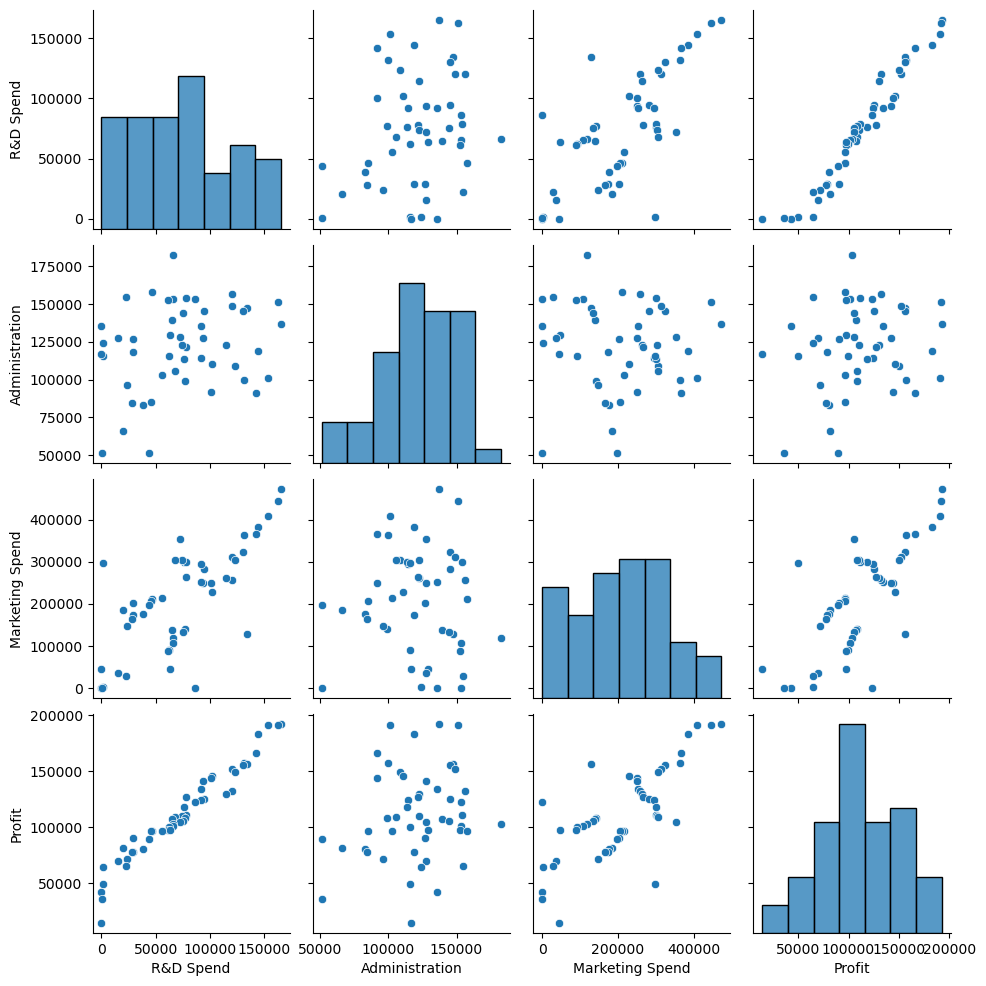

In [49]:
# Explore the relationships between variables using a pairplot
sns.pairplot(data)
plt.show()

### Variable Relationships
- The pairplot visually represents scatter plots for each pair of variables and histograms along the diagonal.
- It helps identify patterns, correlations, and potential outliers in the dataset.

In [50]:
# Extract features (R&D Spend, Administration, Marketing and Spend) and target variable (Profit)
X = data[['R&D Spend', 'Administration', 'Marketing Spend' , 'State']]
y = data['Profit']

# Perform one-hot encoding for the 'State' column
X_encoded = pd.get_dummies(X, columns=['State'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [51]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 82010363.04
R-squared Score: 0.90


### Model Evaluation

- **Mean Squared Error (MSE):** 82,010,363.04
  - A measure of the average squared difference between actual and predicted values.
  - Lower values are desirable, indicating closer alignment between predictions and actual values.

- **R-squared Score:** 0.90
  - A proportion of the variance in the dependent variable (Profit) explained by the independent variables.
  - Ranges from 0 to 1, with 1 indicating a perfect fit.
  - A higher R-squared score suggests a better fit of the regression line to the data.


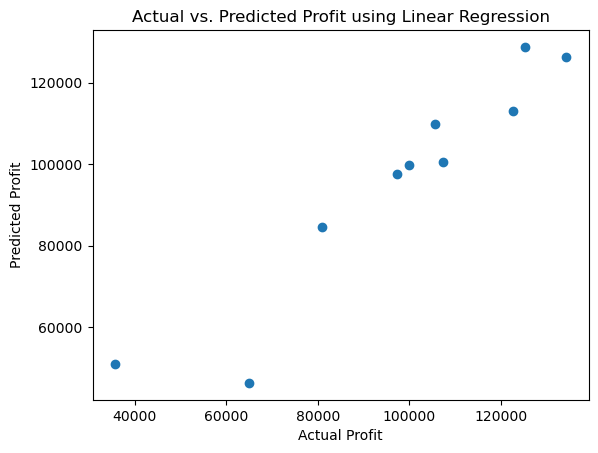

In [52]:
# Visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs. Predicted Profit using Linear Regression')
plt.show()


### Actual vs. Predicted Profit using Linear Regression

- **Scatter Points:** Each point represents a data instance, comparing the actual Profit values (x-axis) against the predicted Profit values (y-axis).
- **Interpretation:** A diagonal alignment would indicate perfect predictions. The spread and distribution of points reveal how well the model captures the variance in Profit.


In [53]:

# Print regression coefficients between -1 and 1
print('Regression Coefficients between -1 and 1:')
for feature, coefficient in zip(X.columns, model.coef_):
    if -1 < coefficient < 1:
        print(f'{feature}: {coefficient:.4f}')

# Rest of the code remains unchanged

# Print variance score (R-squared) and residual error
print(f'\nVariance Score (R-squared): {r2:.4f}')
print(f'Mean Squared Error: {mse:.2f}')


Regression Coefficients between -1 and 1:
R&D Spend: 0.8056
Administration: -0.0688
Marketing Spend: 0.0299

Variance Score (R-squared): 0.8987
Mean Squared Error: 82010363.04


**R&D Spend (0.8056):**
- A one-unit increase in R&D Spend predicts a 0.8056 unit increase in Profit.
- Positive correlation: Higher R&D Spend is associated with higher Profit.

**Administration (-0.0688):**
- A one-unit increase in Administration spending predicts a 0.0688 unit decrease in Profit.
- Negative correlation: Higher Administration spending is associated with lower Profit.

**Marketing Spend (0.0299):**
- A one-unit increase in Marketing Spend predicts a 0.0299 unit increase in Profit.
- Positive correlation: Higher Marketing Spend is associated with higher Profit.


In [54]:
# Plot residual error in training and testing data
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

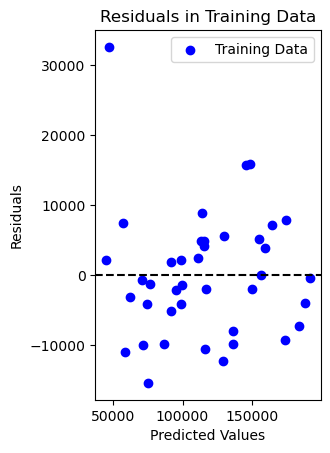

In [55]:
# Training data
plt.subplot(1, 2, 1)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, color="blue", label="Training Data")
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals in Training Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()


### Residuals in Training Data

- **Scatter Points:** Each point represents a data point from the training set. The x-coordinate is the predicted Profit, and the y-coordinate is the residual.
  
- **Horizontal Line (y=0):** Represents zero residual error. Points above indicate overestimation, and below indicate underestimation.

- **Pattern and Spread:** Ideally, a random scattering of points around y=0 is desired. Patterns may suggest model issues or non-linear relationships.

- **Interpretation:** Assess whether the model shows bias or if residuals are randomly distributed.


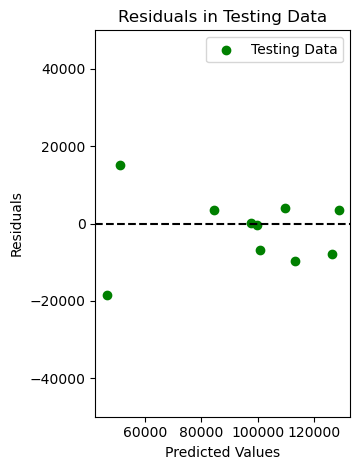

In [56]:
# Testing data
plt.subplot(1, 2, 2)
plt.scatter(y_pred, y_pred - y_test, color="green", label="Testing Data")
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals in Testing Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.ylim(-50000, 50000)
plt.show()

### Residuals in Testing Data

- **Scatter Points:** Each point represents a data point from the testing set. The x-coordinate is the predicted Profit, and the y-coordinate is the residual.
  
- **Horizontal Line (y=0):** Represents zero residual error. Points above indicate overestimation, and below indicate underestimation.

- **Pattern and Spread:** Similar to training data, ideally, a random scattering of points around y=0 is desired.

- **Interpretation:** Evaluate if the model generalizes well to unseen data by assessing the pattern and spread of residuals.


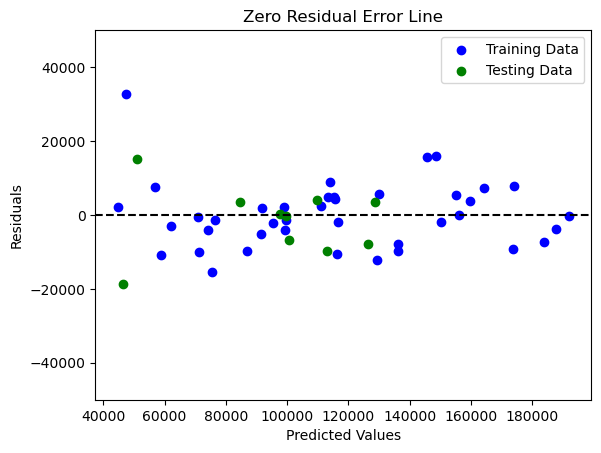

In [57]:
# Plot line for zero residual error with adjusted y-axis limits
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, color="blue", label="Training Data")
plt.scatter(y_pred, y_pred - y_test, color="green", label="Testing Data")
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Zero Residual Error Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()

# Set y-axis limits to create a less magnified view
plt.ylim(-50000, 50000)  # Adjust the values based on your data and preferences

plt.show()


### Zero Residual Error Line with Adjusted Y-axis Limits

- **Scatter Points (Blue):** Training Data residuals with the predicted values. 
- **Scatter Points (Green):** Testing Data residuals with the predicted values. 
- **Horizontal Line (y=0):** Represents zero residual error. Points above indicate overestimation, and below indicate underestimation.

- **Interpretation:** Visualizes how well the model's predictions align with the actual values. Adjusting the y-axis limits provides a less magnified view, allowing for better observation of the overall pattern and trends in residuals.


### Hypothesis for Linear Regression Model

**Null Hypothesis (H0):**
There is no significant linear relationship between the predictor variables (R&D Spend, Administration, Marketing Spend) and the target variable (Profit).

**Alternative Hypothesis (H1):**
There exists a significant linear relationship between at least one of the predictor variables and the target variable.

**Interpretation:**
- If the p-value associated with the F-statistic is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis.
- Rejection of the null hypothesis indicates that the model has statistically significant explanatory power, and at least one predictor variable contributes to predicting the target variable (Profit).
